In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Load the dataset
df = pd.read_csv('dataset.csv')
df.dropna(inplace=True)  # Drop missing values

Dataset Head:
   Rk            Player   Pos  Age   Tm   G  GS    MP   FG   FGA  ...    FT%  \
0   1  Precious Achiuwa  PF-C   24  TOT  74  18  21.9  3.2   6.3  ...  0.616   
1   1  Precious Achiuwa     C   24  TOR  25   0  17.5  3.1   6.8  ...  0.571   
2   1  Precious Achiuwa    PF   24  NYK  49  18  24.2  3.2   6.1  ...  0.643   
3   2       Bam Adebayo     C   26  MIA  71  71  34.0  7.5  14.3  ...  0.755   
4   3      Ochai Agbaji    SG   23  TOT  78  28  21.0  2.3   5.6  ...  0.661   

   ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  2.6  4.0   6.6  1.3  0.6  0.9  1.1  1.9   7.6  
1  2.0  3.4   5.4  1.8  0.6  0.5  1.2  1.6   7.7  
2  2.9  4.3   7.2  1.1  0.6  1.1  1.1  2.1   7.6  
3  2.2  8.1  10.4  3.9  1.1  0.9  2.3  2.2  19.3  
4  0.9  1.8   2.8  1.1  0.6  0.6  0.8  1.5   5.8  

[5 rows x 30 columns]

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  ------

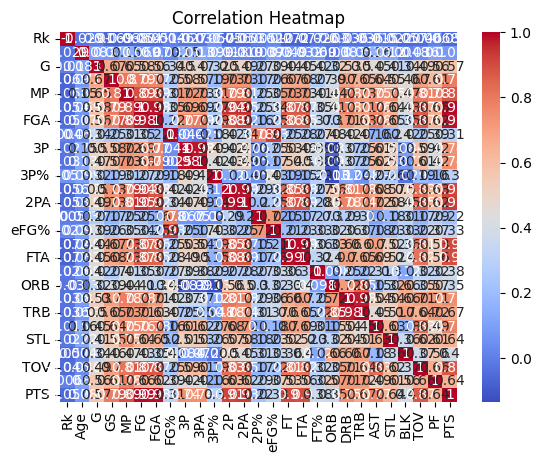

Selected Feature Columns:
['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
Iteration 0: Loss = 104.32
Iteration 100: Loss = 9.13
Iteration 200: Loss = 1.42
Iteration 300: Loss = 0.34
Iteration 400: Loss = 0.17
Iteration 500: Loss = 0.13
Iteration 600: Loss = 0.11
Iteration 700: Loss = 0.10
Iteration 800: Loss = 0.10
Iteration 900: Loss = 0.09


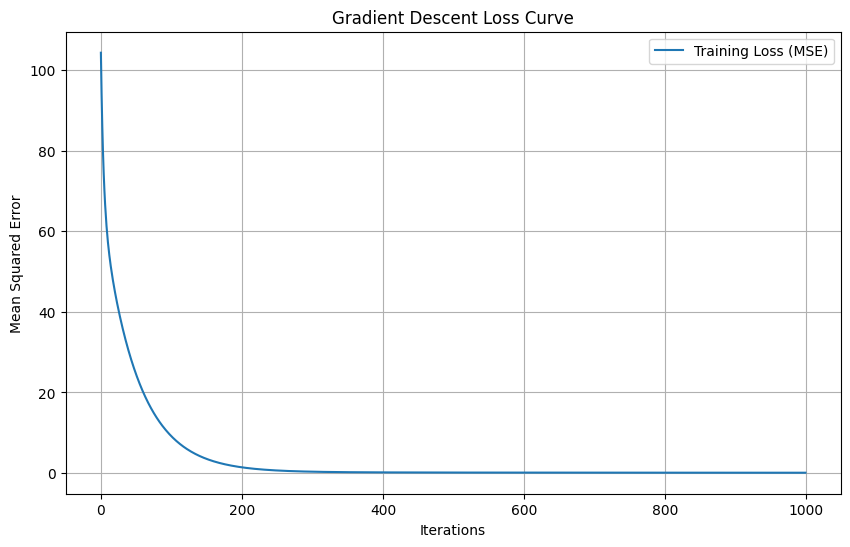

Gradient Descent - Training R2 Score: 0.9978822136717811
Gradient Descent - Test R2 Score: 0.997922652584165


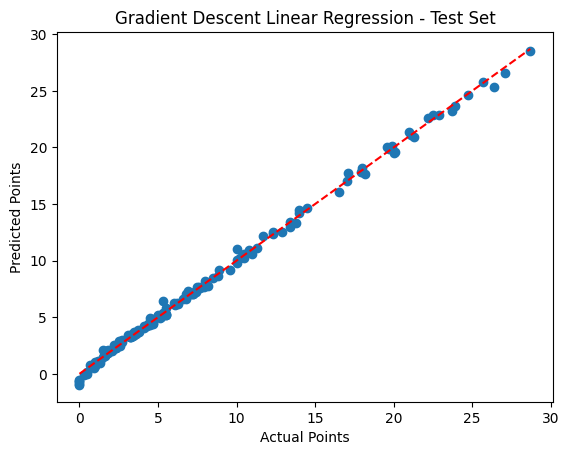

Random Forest R2 Score: 0.9946592561754436
Decision Tree R2 Score: 0.9849121239291321
Best model saved as 'best_model.pkl'


In [27]:
# Data Exploration
import joblib
from sklearn.discriminant_analysis import StandardScaler


print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Handling Missing Values
df = df.dropna()  # Drop rows with any missing values

# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Visualization
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Selection and Target Variable
features = df.drop(columns=['PTS', 'Rk', 'Player', 'Pos', 'Tm'], errors='ignore')
target = df['PTS']

print("Selected Feature Columns:")
print(features.columns.tolist())

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalize features for gradient descent
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression using Gradient Descent
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculate and store MSE
            mse = np.mean((y_predicted - y)**2)
            self.loss_history.append(mse)
            
            # Print progress every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}: Loss = {mse:.2f}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Initialize and train model with loss tracking
lr_gd = LinearRegressionGD(learning_rate=0.01, iterations=1000)
lr_gd.fit(X_train_scaled, y_train.values)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(lr_gd.loss_history, label='Training Loss (MSE)')
plt.title('Gradient Descent Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# Predictions and Evaluation
y_pred_train = lr_gd.predict(X_train_scaled)
y_pred_test = lr_gd.predict(X_test_scaled)

print("Gradient Descent - Training R2 Score:", r2_score(y_train, y_pred_train))
print("Gradient Descent - Test R2 Score:", r2_score(y_test, y_pred_test))

# Scatter plot
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Gradient Descent Linear Regression - Test Set')
plt.show()

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest R2 Score:", r2_score(y_test, rf_pred))

# Decision Tree Model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree R2 Score:", r2_score(y_test, dt_pred))

# Save the model with the highest R2 score
best_model = max([(lr_gd, r2_score(y_test, y_pred_test)), (rf, r2_score(y_test, rf_pred)), (dt, r2_score(y_test, dt_pred))], key=lambda x: x[1])[0]
joblib.dump(best_model, 'best_model.pkl')

print("Best model saved as 'best_model.pkl'")

In [9]:
print(df.columns)


Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')
